In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Build a ML predictive model to predict whether customer will leave or continue using the banking service using the following bank data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['Exited'].unique()

array([1, 0])

In [5]:
#drop the columns not required to build a ml model

df1 = df.drop(columns = ['RowNumber',	'CustomerId', 'Surname'])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EDA - Exploratory Data Analysis**

* Univariate Analysis - Analysing one data column at a time
* Bivariate Analysis - Analysing two data column at a time and their effect on each other
* Multivariate Analysis - Analysing mutilple data column at a time and their effect on each other

**Univariate Analysis**

    * Categorical column
    * Continous column

In [8]:
#Categorical

print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [10]:
#frequency of categorical values

print(df['Geography'].value_counts())
print()
print(df['Gender'].value_counts())
print()
print(df['NumOfProducts'].value_counts())
print()
print(df['HasCrCard'].value_counts())
print()
print(df['IsActiveMember'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64


<Axes: xlabel='Geography'>

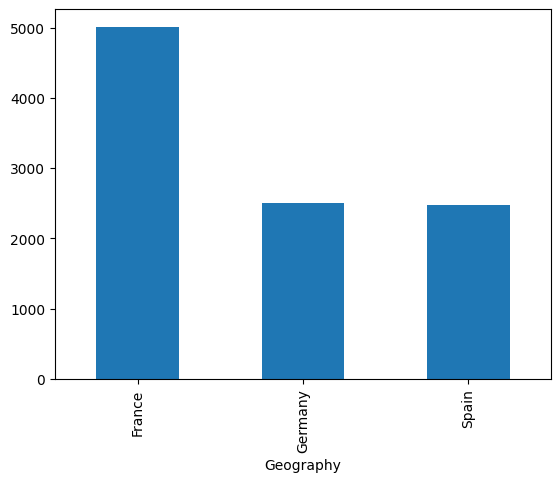

In [11]:
df['Geography'].value_counts().plot.bar()

<Axes: ylabel='count'>

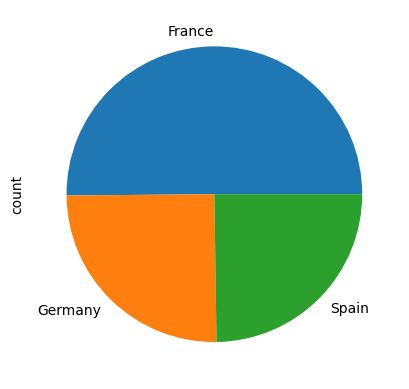

In [12]:
df['Geography'].value_counts().plot.pie()

<Axes: xlabel='Gender'>

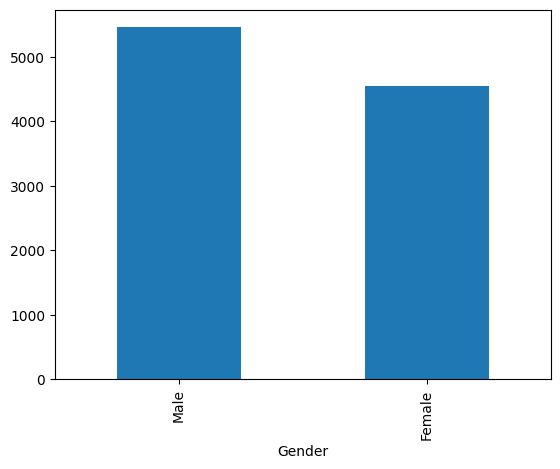

In [13]:
df['Gender'].value_counts().plot.bar()

<Axes: xlabel='NumOfProducts'>

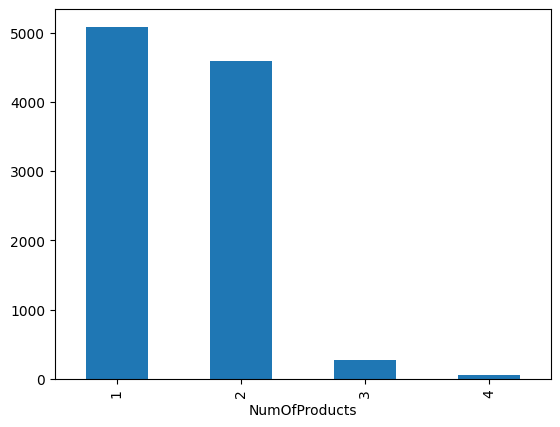

In [14]:
df['NumOfProducts'].value_counts().plot.bar()

<Axes: xlabel='HasCrCard'>

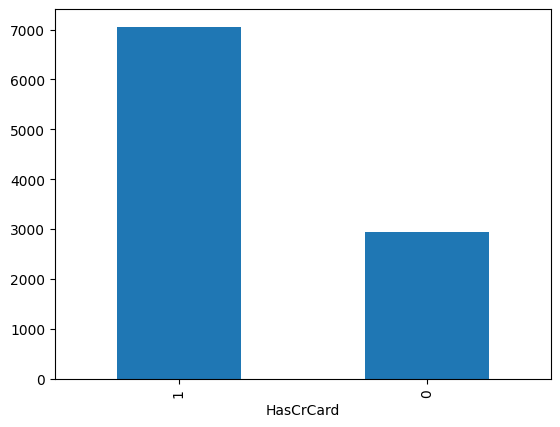

In [15]:
df['HasCrCard'].value_counts().plot.bar()

<Axes: xlabel='IsActiveMember'>

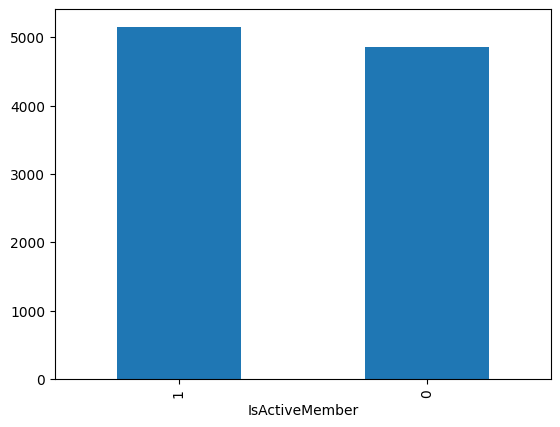

In [16]:
df['IsActiveMember'].value_counts().plot.bar()